Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [4]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(2195, 24)

In [6]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2195 non-null   object 
 1   MDVP:Fo(Hz)       2195 non-null   float64
 2   MDVP:Fhi(Hz)      2195 non-null   float64
 3   MDVP:Flo(Hz)      2195 non-null   float64
 4   MDVP:Jitter(%)    2195 non-null   float64
 5   MDVP:Jitter(Abs)  2195 non-null   float64
 6   MDVP:RAP          2195 non-null   float64
 7   MDVP:PPQ          2195 non-null   float64
 8   Jitter:DDP        2195 non-null   float64
 9   MDVP:Shimmer      2195 non-null   float64
 10  MDVP:Shimmer(dB)  2195 non-null   float64
 11  Shimmer:APQ3      2195 non-null   float64
 12  Shimmer:APQ5      2195 non-null   float64
 13  MDVP:APQ          2195 non-null   float64
 14  Shimmer:DDA       2195 non-null   float64
 15  NHR               2195 non-null   float64
 16  HNR               2195 non-null   float64


In [7]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [8]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,...,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000,2195.000000
mean,154.965976,199.622952,116.715856,0.006316,0.000044,0.003370,0.003506,0.010110,0.029757,0.283622,...,0.046894,0.025739,21.905904,0.754897,0.497874,0.718056,-5.693914,0.225235,2.385053,0.206480
std,41.495344,94.038975,43.128654,0.005194,0.000037,0.003187,0.002967,0.009563,0.019533,0.203795,...,0.031362,0.043374,4.503191,0.430246,0.100409,0.055440,1.091752,0.082384,0.381916,0.091469
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.963000,135.403500,84.510000,0.003390,0.000020,0.001650,0.001830,0.004950,0.016430,0.145000,...,0.024600,0.005860,19.269000,1.000000,0.427627,0.674953,-6.452058,0.173520,2.108873,0.135242
50%,149.689000,177.291000,104.437000,0.004940,0.000030,0.002470,0.002630,0.007420,0.022960,0.216000,...,0.038310,0.011610,22.085000,1.000000,0.491345,0.722085,-5.724056,0.218037,2.344348,0.192730
75%,186.163000,227.381000,142.299000,0.007270,0.000060,0.003800,0.003960,0.011400,0.038100,0.350000,...,0.060620,0.024850,25.135000,1.000000,0.583390,0.762726,-5.070096,0.270641,2.634633,0.253556
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

,count
status,
1,1657
0,538


1  --> Parkinson's Positive

0 --> Healthy


In [10]:
# grouping the data based on the target variable
parkinsons_data.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,182.897654,232.268084,143.228204,0.003844,0.000023,0.001921,0.002052,0.005762,0.017946,0.165963,...,0.013537,0.029066,0.011595,24.672435,0.449321,0.694496,-6.774082,0.159837,2.161227,0.122149
1,145.897031,189.023628,108.107744,0.007119,0.000051,0.003840,0.003978,0.011521,0.033591,0.321824,...,0.027723,0.052682,0.030332,21.007658,0.513638,0.725706,-5.343202,0.246468,2.457725,0.233860


Data Pre-Processing

Separating the features & Target

In [11]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [12]:
print(X)

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0         119.992       157.302        74.997         0.00784   
1         122.400       148.650       113.819         0.00968   
2         116.682       131.111       111.555         0.01050   
3         116.676       137.871       111.366         0.00997   
4         116.014       141.781       110.655         0.01284   
...           ...           ...           ...             ...   
2190      117.274       129.916       110.402         0.00752   
2191      153.880       172.860        78.128         0.00480   
2192      121.345       139.644        98.250         0.00684   
2193      138.145       197.238        81.114         0.00544   
2194      116.682       131.111       111.555         0.01050   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0              0.00007   0.00370   0.00554     0.01109       0.04374   
1              0.00008   0.00465   0.00696     0.01394       0.06134   
2  

In [13]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
2190    1
2191    1
2192    1
2193    1
2194    1
Name: status, Length: 2195, dtype: int64


Splitting the data to training data & Test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(2195, 22) (1756, 22) (439, 22)


Model Training

Support Vector Machine Model

In [16]:
model = svm.SVC(kernel='linear')

In [17]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [18]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [19]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9003416856492027


In [20]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [21]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.9066059225512528


Building a Predictive System

In [22]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


--- Training Logistic Regression ---


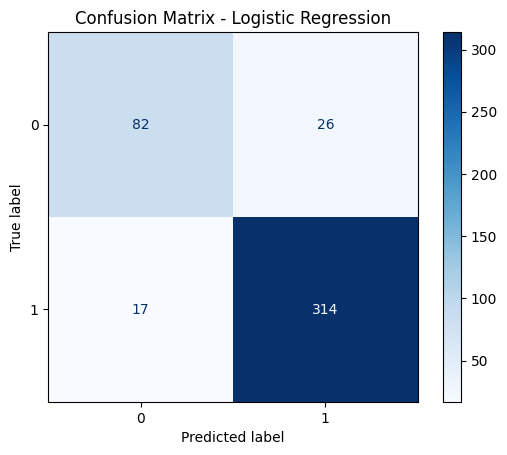

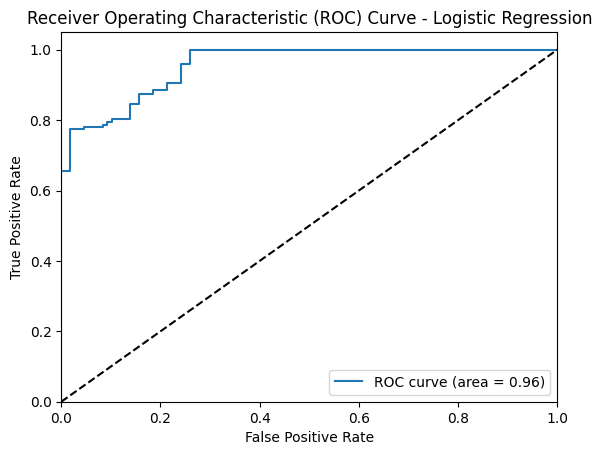

--- Training K-Nearest Neighbors (KNN) ---


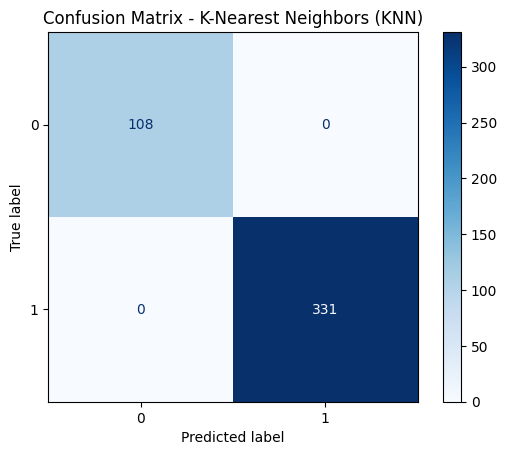

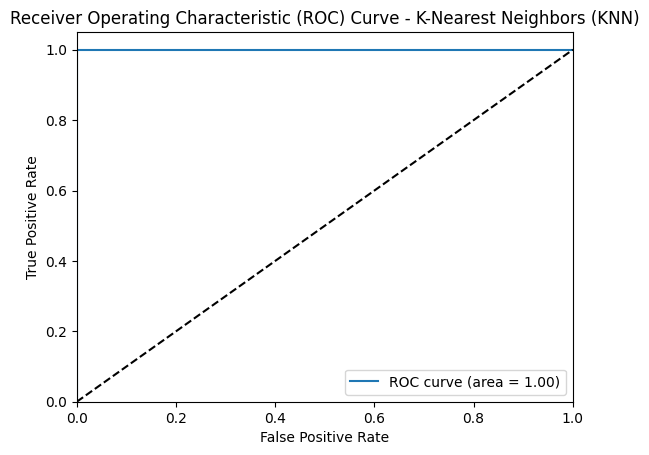

--- Training Stochastic Gradient Descent (SGD) ---


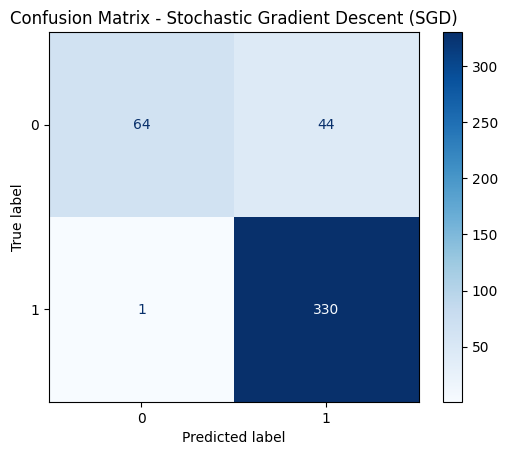

--- Training Support Vector Machine (SVM) ---


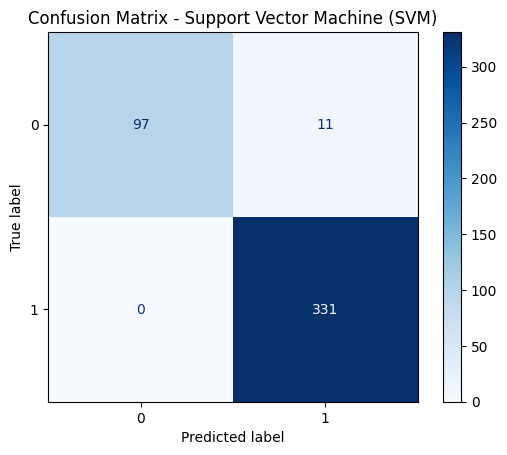

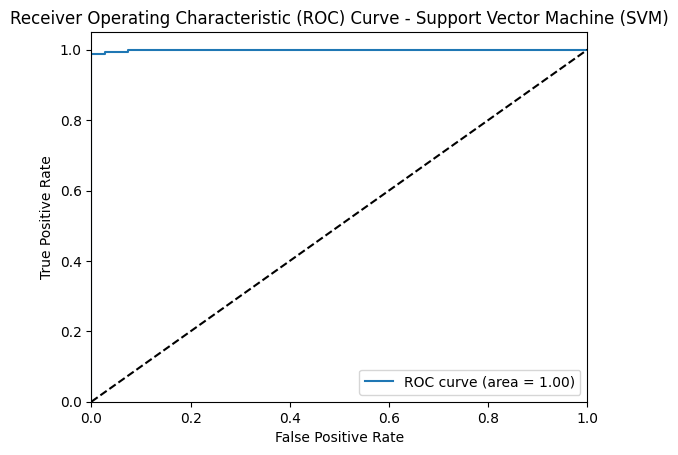

--- Training Naive Bayes ---


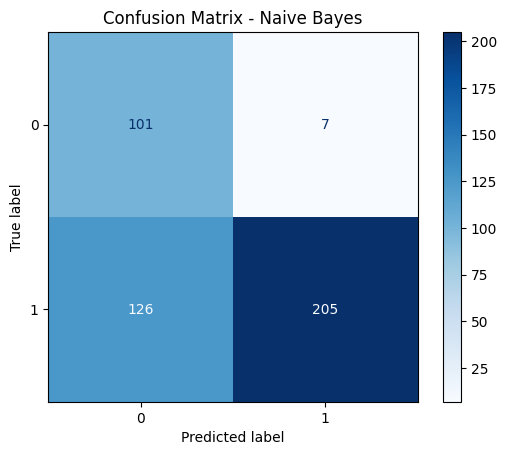

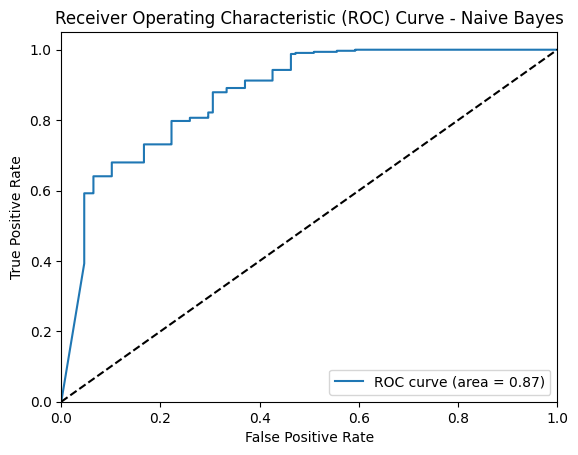

--- Training Decision Tree ---


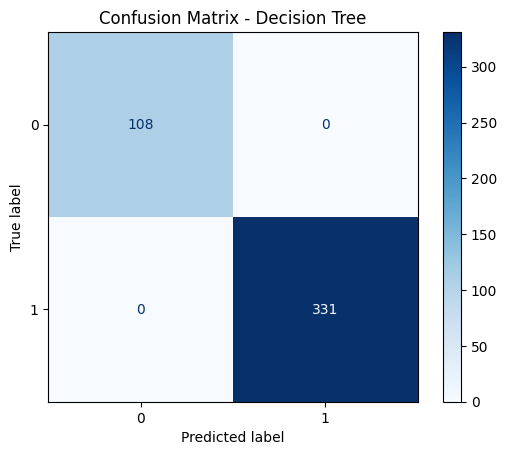

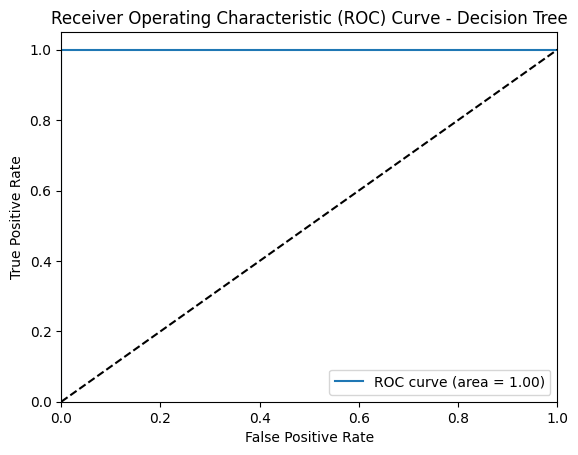

--- Training Random Forest ---


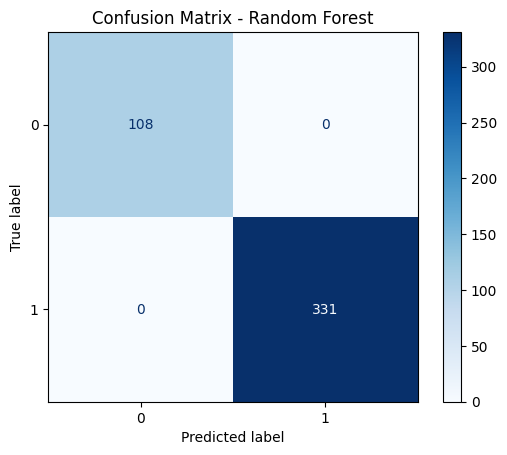

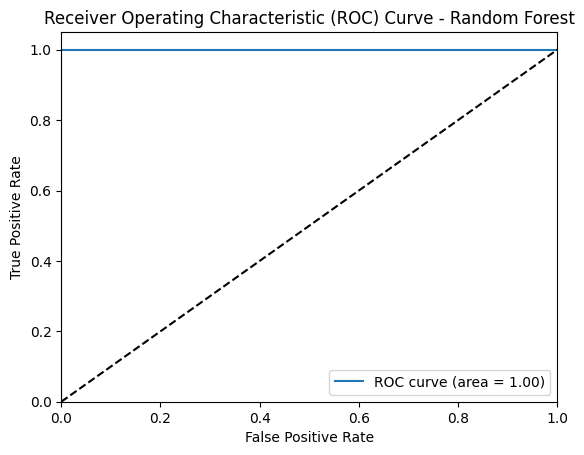

--- Training XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:08:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


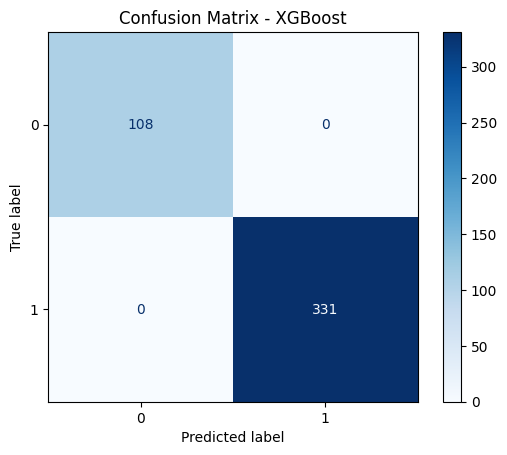

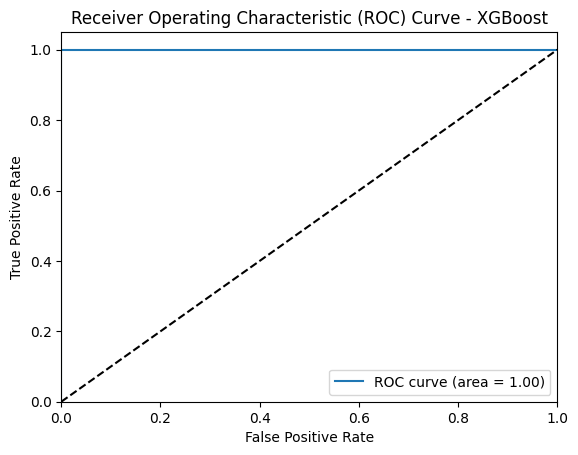



--- Model Performance Summary ---
                                   Accuracy Precision    Recall  F1 Score  \
Logistic Regression                 0.90205  0.923529   0.94864  0.935917   
K-Nearest Neighbors (KNN)               1.0       1.0       1.0       1.0   
Stochastic Gradient Descent (SGD)  0.897494  0.882353  0.996979   0.93617   
Support Vector Machine (SVM)       0.974943  0.967836       1.0  0.983655   
Naive Bayes                        0.697039  0.966981  0.619335  0.755064   
Decision Tree                           1.0       1.0       1.0       1.0   
Random Forest                           1.0       1.0       1.0       1.0   
XGBoost                                 1.0       1.0       1.0       1.0   

                                    ROC-AUC  
Logistic Regression                0.955102  
K-Nearest Neighbors (KNN)               1.0  
Stochastic Gradient Descent (SGD)       N/A  
Support Vector Machine (SVM)       0.999385  
Naive Bayes                        0.874

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay # Explicitly import ConfusionMatrixDisplay

# Import the models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

# --- 1. Load and Prepare the Data ---
# Load your dataset from a CSV file
# Make sure the target variable (what you want to predict) is in a column named 'status'
try:
    df = pd.read_csv('/content/parkinsons.csv')
except FileNotFoundError:
    print("Error: 'parkinsons.csv' not found. Please replace with the actual path to your data.")
    # As a placeholder, creating a dummy dataframe
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=208, n_features=60, n_informative=10, n_redundant=10, random_state=42)
    df = pd.DataFrame(X)
    df['status'] = y


# Separate features (X) and the target variable (y)
X = df.drop(['status', 'name'], axis=1)
y = df['status']

# --- 2. Split the Data into Training and Testing Sets ---
# This divides the data so you can train the model on one part and test its performance on another.
# test_size=0.2 means 20% of the data will be used for testing.
# random_state ensures the split is the same every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. Scale the Features (Optional but Recommended) ---
# Scaling standardizes the feature values (e.g., mean=0, std=1), which helps many models perform better.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 4. Initialize and Train the Models ---

# Create a dictionary to hold all the models you want to train
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Stochastic Gradient Descent (SGD)": SGDClassifier(),
    "Support Vector Machine (SVM)": SVC(probability=True), # probability=True is needed for ROC-AUC
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through each model, train it, and store its performance
results = {}
for name, model in models.items():
    print(f"--- Training {name} ---")

    # Train the model on the (scaled) training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'


    # Store the results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc
    }

    # Display Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(0), str(1)]) # Convert labels to strings
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Display ROC Curve
    if y_pred_proba is not None and roc_auc != 'N/A':
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()


# --- 5. Display the Results ---
print("\n\n--- Model Performance Summary ---")
results_df = pd.DataFrame(results).T
print(results_df)

Saving the trained model

In [28]:
# training the SVM model with training data
model.fit(X_train, Y_train)

# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:09:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


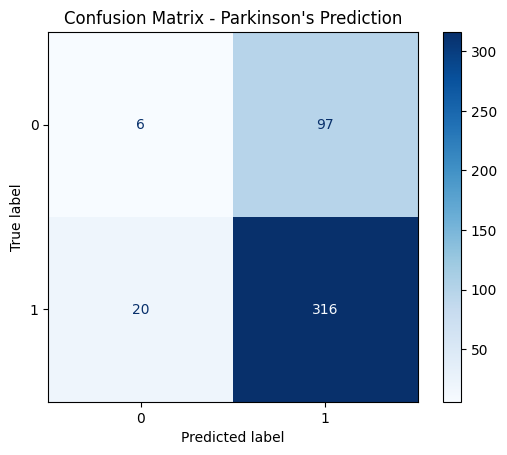

In [29]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Parkinson's Prediction")
plt.show()

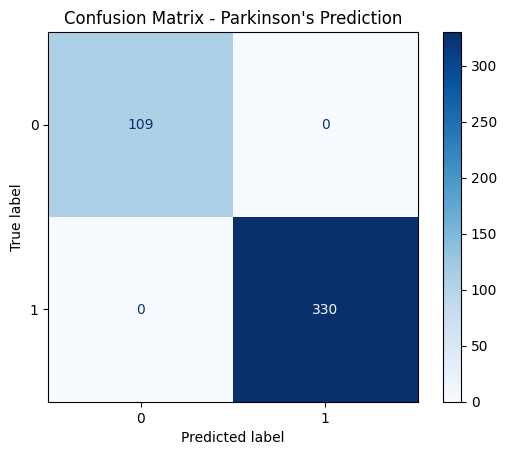

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Parkinson's Prediction")
plt.show()

In [31]:
# Define the SVM model
model = svm.SVC(kernel='linear')

In [32]:
# training the SVM model with training data
model.fit(X_train, Y_train)

# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [33]:
import pickle

In [34]:
filename = 'parkinsons_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [35]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))

In [36]:
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
